# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [10]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf



In [12]:
%config IPCompleter.greedy=True

(0.0, 10.5)

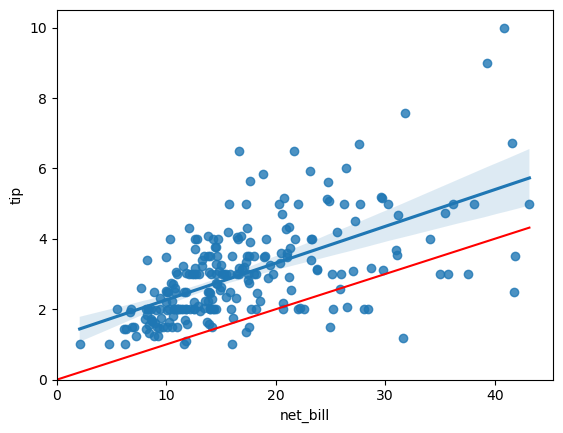

In [42]:
tips = sns.load_dataset('tips')

tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip']/tips['net_bill']



sns.regplot(x='net_bill', y='tip', data = tips[tips['tip_pct']<.5])
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*x
plt.plot(x, y, '-r', label = 'linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.52e-06
Time:                        17:21:23   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

<Axes: xlabel='net_bill', ylabel='tip_pct'>

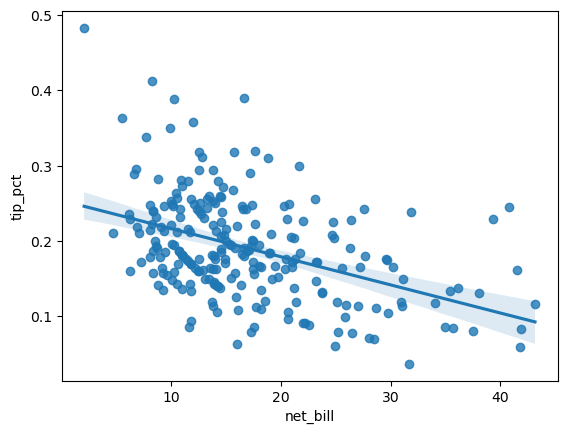

In [59]:
reg1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2 = smf.ols('tip ~ net_bill', data = tips).fit()
print(reg1.summary())
print(reg2.summary())

sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips[tips['tip_pct'] < .5])

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O gráfico 1 demonstra que quanto maior a conta pré-gorjeta, maior é a gorjeta recebida. No entanto, algo diferente acontece com relação ao percentual: quanto maior o valor da conta pré-gorjeta, MENOR o percentual de gorjeta. Isto é, embora contas mais altas resultem em gorjetas maiores, contas mais altas resultam em PERCENTUAIS menores de gorjeta.

Quanto ao R², a nossa primeira previsão regressão tem um R² de .09, enquanto a segunda de .3,então, podemos afirmar que o R² da primeira é BEM menor que o da segunda... Ou seja, existe mais aleatoriedade no percentual da gorjeta com relação à conta do que no valor bruto da gorjeta com relação á conta

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [78]:
print(tips.head())

# print(reg2.fittedvalues.head())

tips['previsao'] = tips['net_bill']*reg2.fittedvalues
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  net_bill   tip_pct  \
0       16.99  1.01  Female     No  Sun  Dinner     2     15.98  0.063204   
1       10.34  1.66    Male     No  Sun  Dinner     3      8.68  0.191244   
2       21.01  3.50    Male     No  Sun  Dinner     3     17.51  0.199886   
3       23.68  3.31    Male     No  Sun  Dinner     2     20.37  0.162494   
4       24.59  3.61  Female     No  Sun  Dinner     4     20.98  0.172069   

    previsao  
0  46.630446  
1  19.034500  
2  53.756242  
3  68.323532  
4  71.640801  
   total_bill   tip     sex smoker  day    time  size  net_bill   tip_pct  \
0       16.99  1.01  Female     No  Sun  Dinner     2     15.98  0.063204   
1       10.34  1.66    Male     No  Sun  Dinner     3      8.68  0.191244   
2       21.01  3.50    Male     No  Sun  Dinner     3     17.51  0.199886   
3       23.68  3.31    Male     No  Sun  Dinner     2     20.37  0.162494   
4       24.59  3.61  Female     No  Sun  Dinner     4     20.9